In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=62acf673ff124d862c969e2ae201a13d82e46db472ff1f817912f05d37ed7f95
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

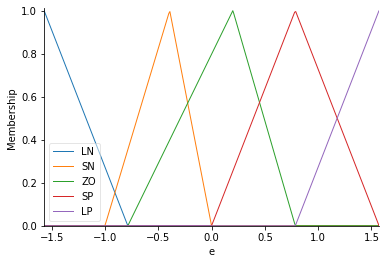

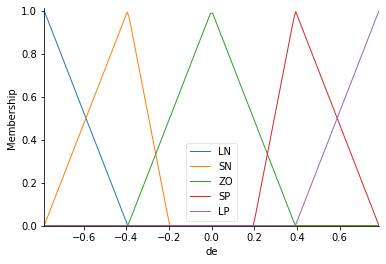

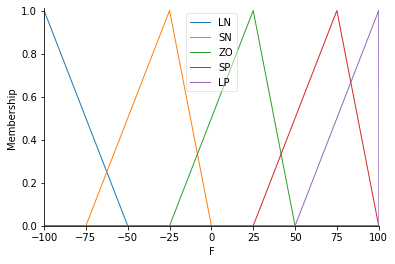

In [ ]:
e = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2,0.01),'e')
de = ctrl.Antecedent(np.arange(-np.pi/4,np.pi/4,0.01),'de')
F = ctrl.Consequent(np.arange(-100,100.2,0.1),'F')

e['LN'] = fuzz.trimf(e.universe,[-np.pi/2,-np.pi/2,-np.pi/4])
e['SN'] = fuzz.trimf(e.universe,[-1,-np.pi/8,0])
e['ZO'] = fuzz.trimf(e.universe,[-np.pi/4,0.2,np.pi/4])
e['SP'] = fuzz.trimf(e.universe,[0,np.pi/4,np.pi/2])
e['LP'] = fuzz.trimf(e.universe,[np.pi/4,np.pi/2,np.pi/2])
e.view()
de['LN'] = fuzz.trimf(de.universe,[-np.pi/4,-np.pi/4,-np.pi/8])
de['SN'] = fuzz.trimf(de.universe,[-np.pi/4,-np.pi/8,-np.pi/16])
de['ZO'] = fuzz.trimf(de.universe,[-np.pi/8,0,np.pi/8])
de['SP'] = fuzz.trimf(de.universe,[np.pi/16,np.pi/8,np.pi/4])
de['LP'] = fuzz.trimf(de.universe,[np.pi/8,np.pi/4,np.pi/4])
de.view()
F['LN'] = fuzz.trimf(F.universe,[-100,-100,-50])
F['SN'] = fuzz.trimf(F.universe,[-75,-25,0])
F['ZO'] = fuzz.trimf(F.universe,[-25,25,50])
F['SP'] = fuzz.trimf(F.universe,[25,75,100])
F['LP'] = fuzz.trimf(F.universe,[50,100,100])
F.view()

In [ ]:
rule1 = ctrl.Rule(e['LN'] & de['LN'], F['LN'])
rule2 = ctrl.Rule(e['LN'] & de['SN'], F['LN'])
rule3 = ctrl.Rule(e['LN'] & de['ZO'], F['SN'])
rule4 = ctrl.Rule(e['LN'] & de['SP'], F['SN'])
rule5 = ctrl.Rule(e['LN'] & de['LP'], F['ZO'])

rule6 = ctrl.Rule(e['SN'] & de['LN'], F['SN'])
rule7 = ctrl.Rule(e['SN'] & de['SN'], F['SN'])
rule8 = ctrl.Rule(e['SN'] & de['ZO'], F['SN'])
rule9 = ctrl.Rule(e['SN'] & de['SP'], F['ZO'])
rule10 = ctrl.Rule(e['SN'] & de['LP'], F['ZO'])

rule11 = ctrl.Rule(e['ZO'] & de['LN'], F['SN'])
rule12 = ctrl.Rule(e['ZO'] & de['SN'], F['SN'])
rule13 = ctrl.Rule(e['ZO'] & de['ZO'], F['ZO'])
rule14 = ctrl.Rule(e['ZO'] & de['SP'], F['ZO'])
rule15 = ctrl.Rule(e['ZO'] & de['LP'], F['SP'])

rule16 = ctrl.Rule(e['SP'] & de['LN'], F['SN'])
rule17 = ctrl.Rule(e['SP'] & de['SN'], F['ZO'])
rule18 = ctrl.Rule(e['SP'] & de['ZO'], F['SP'])
rule19 = ctrl.Rule(e['SP'] & de['SP'], F['SP'])
rule20 = ctrl.Rule(e['SP'] & de['LP'], F['LP'])

rule21 = ctrl.Rule(e['LP'] & de['LN'], F['ZO'])
rule22 = ctrl.Rule(e['LP'] & de['SN'], F['SN'])
rule23 = ctrl.Rule(e['LP'] & de['ZO'], F['SP'])
rule24 = ctrl.Rule(e['LP'] & de['SP'], F['LP'])
rule25 = ctrl.Rule(e['LP'] & de['LP'], F['LP'])

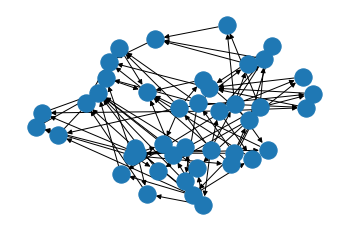

In [ ]:
F_value = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22, rule23, rule24, rule25])
F_value_sim = ctrl.ControlSystemSimulation(F_value)
F_value.view()

54.09802674583644


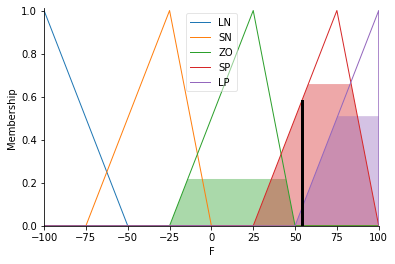

In [ ]:
F_value_sim.input['e'] = 0.4
F_value_sim.input['de'] = 0.7
F_value_sim.compute()
value = F_value_sim.output['F']
print(value)
F.view(sim=F_value_sim)